# Astroplan Plotting Examples - Sky Plot

To generate sky plots with `Astroplan`, use the `plot_sky` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_sky` will return an `Axes` object with target positions plotted at the time(s) specified.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## Contents

[General guidelines](#General-guidelines.)

[Making a sky plot for one instance in time.](#Making-a-sky-plot-for-one-instance-in-time.)

[Showing the movement of celestial bodies.](#Showing-the-movement-of-celestial-bodies-over-time.)

[Warning--Objects below the horizon.](#Warning---Objects-below-horizon.)

[Customizing your plot.](#Customizing-your-plot)

   - [Style options.](#Changing-style-options.)
    
   - [Coordinates.](#Changing-coordinate-defaults.)

   - [Other tweaks.](#Other-tweaks.)

[Explicitly passing in an `Axes` object.](#Explicitly-passing-in-an-Axes-object)

   - [Multiple plots.](#Making-multiple-plots.)

## General guidelines.

Most users will want to see the positions of several `Target`s with respect to an `Observer`'s zenith, as well as the positions of familiar stars or other objects to act as guides.  

`plot_sky` allows you to pass in only one `Target` at a time (like `plot_airmass` and `plot_parallactic`), so if you want to map the positions of multiple objects on the same plot, you have two options:

* Allow `plot_sky` to reuse the returned `Axes` object to map multiple objects on the same plot (simply reissue the command with a new `Target` argument).
* Explicitly use a previously constructed polar `Axes` object as an input.

However, you do have the option of passing in a `Time` object that contains as many instances in time as you like.  This means that you can:

* See the position of celestial bodies at a single instance in time OR 
* Map them over the course of a night.

Note that whatever you do, you must use the same `Observer` when reusing an `Axes` object.  

`plot_sky` currently produces polar plots in altitude/azimuth coordinates only, but does allow for multiple plotting styles and certain coordinate changes for customization.

## Making a sky plot for one instance in time.

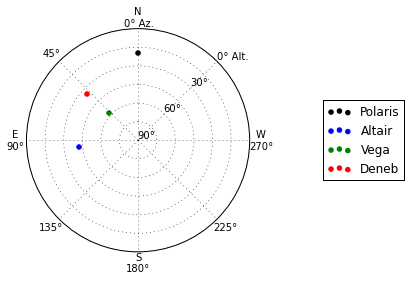

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_sky

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
polaris = FixedTarget(name='Polaris', coord=coordinates)

coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates)
altair_style = {'marker': 'o', 'color': 'b'}

coordinates = SkyCoord('18h36m56.5s', '+38d47m06.6s', frame='icrs')
vega = FixedTarget(name='Vega', coord=coordinates)
vega_style = {'marker': 'o', 'color': 'g'}

coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)
deneb_style = {'marker': 'o', 'color': 'r'}

observe_time = Time(['2015-03-15 15:30:00'])

plot_sky(polaris, observer, observe_time)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

## Showing the movement of celestial bodies over time.

You can make a plot that shows how your targets move over time in the same way you make a plot for one instance of time (see example [above](#Making-a-sky-plot-for-one-instance-in-time.)).  You simply input a vector instead of a scalar `Time` object--that is, just populate your `Time` object with multiple times.

You can center the window of time covered by your `Time` object at one particular instance...

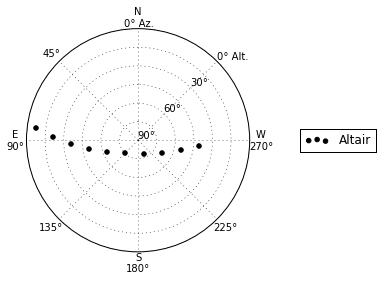

In [9]:
import numpy as np

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(altair, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

...or, if you know the start and end times of your observation run, you can use a `DeltaTime` object.

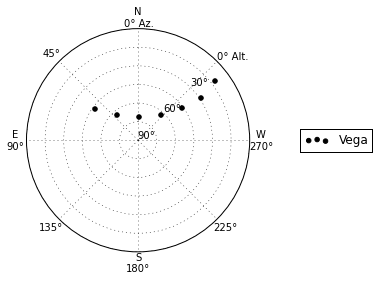

In [10]:
start_time = Time('2015-03-15 14:30:00')
end_time = Time('2015-03-15 23:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 7)

plot_sky(vega, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Warning - Objects below horizon.

Note that in the case of an object being under the horizon (negative altitude) for any of the times in your input `Time` object, `plot_sky` will warn you.  Your object(s) will not show up on the plot for that particular time, but `plot_sky` will still map any positions that are above the horizon.

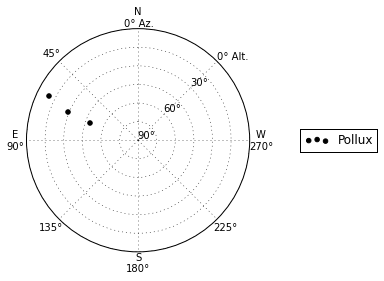

In [11]:
coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
pollux = FixedTarget(name='Pollux', coord=coordinates)

start_time = Time('2015-01-15 18:00:00')
end_time = Time('2015-01-16 07:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 10)

plot_sky(pollux, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Customizing your plot

Now that you know how to make basic sky maps with `plot_sky`, you may want to tweak your plots.

### Changing style options.

The default marker is a black circle, but you can change the `marker` and `color` properties of any target by setting the `style_kwargs` option, as seen above in the various examples.  

One situation in which this is particularly useful is the plotting of guide positions, such as a few familiar stars or any body used in calibrating your telescope.  You can also use this feature to set apart different types of targets (e.g., high-priority, candidates for observing run, etc.).

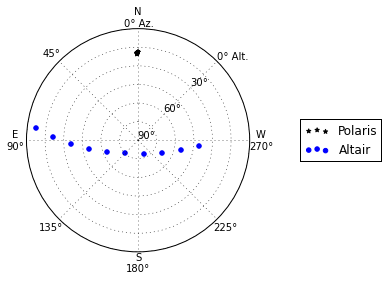

In [12]:
guide_style = {'marker': '*'}
target_style = {'color': 'b'}

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(polaris, observer, observe_time, style_kwargs=guide_style)
plot_sky(altair, observer, observe_time, style_kwargs=target_style)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Changing coordinate defaults.

The default position of `North` (`azimuth = 0`) is at the top of of the plot, with azimuth increasing counter-clockwise (CCW), as seen in all previous examples

To change the position of `North`, use the optional `north` argument.  

You have four options:

* 'top' (default)
* 'left'
* 'bottom'
* 'right'

If `plot_sky` can't understand your `north` argument (if it's not exactly one of the four strings specified above), it will use `north='top'`.

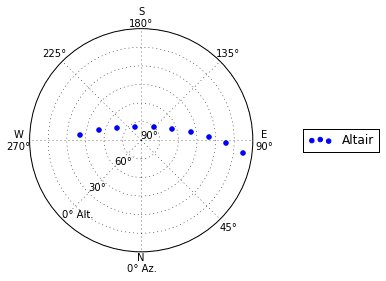

In [13]:
plot_sky(altair, observer, observe_time, style_kwargs=target_style, north='bottom')

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

If you want to azimuth to increase in the clockwise (CW) direction, use the optional `inc_az_ccw` argument.

You have two options:

* True (default; azimuth increases CCW)
* False (azimuth increases CW)

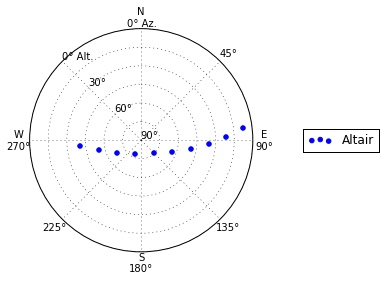

In [14]:
plot_sky(altair, observer, observe_time, style_kwargs=target_style, inc_az_ccw=False)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

### Other tweaks.

You can easily change other plot attributes by acting on the returned `Axes` object or via `plt.figure`, `plt.rc`, and other calls.

For instance, you can increase the size of your plot and its font.

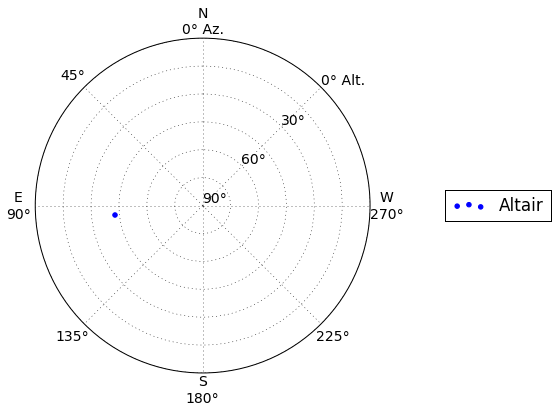

In [19]:
# Note that you need to set the size of the figure before you issue the plotting command
plt.figure(figsize=(8,6))
plt.rc('font', size=14)

plot_sky(altair, observer, observe_time, style_kwargs=target_style)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

# Change font size back to default once done plotting.
plt.rc('font', size=12)

# Explicitly passing in an `Axes` object

The easiest way to reuse an `Axes` object for plotting multiple targets is to let `plot_sky` handle this internally, but you have the flexibility of passing in a named axis, assuming that it is in the polar projection.

Here, we explicitly give a name to the `Axes` object returned by `plot_sky` when plotting Polaris, and reuse it to plot Altair.

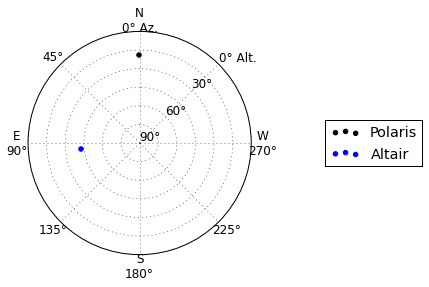

In [16]:
observe_time = Time(['2015-03-15 15:30:00'])

my_ax = plot_sky(polaris, observer, observe_time)
plot_sky(altair, observer, observe_time, my_ax, style_kwargs=altair_style)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Here, we first create an `Axes` object entirely outside of `plot_sky`, then pass it in.

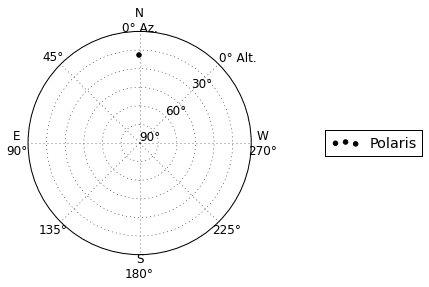

In [17]:
my_ax = plt.gca(projection='polar')
plot_sky(polaris, observer, observe_time, my_ax)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

### Making multiple plots.

Passing in named `Axes` objects comes in handy when you want to make multiple plots.

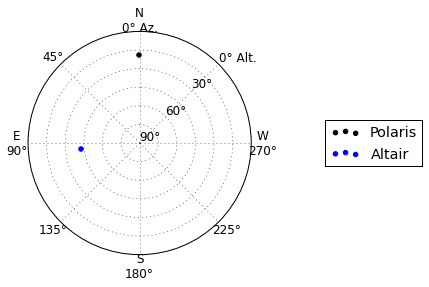

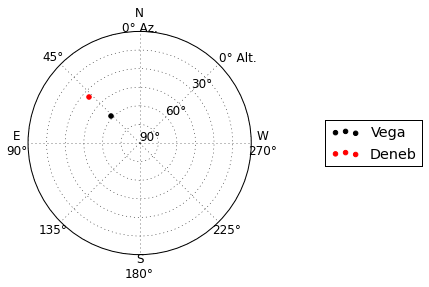

In [18]:
my_ax = plot_sky(polaris, observer, observe_time)
plot_sky(altair, observer, observe_time, my_ax, style_kwargs=altair_style)
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
# Note that this plt.show (or another action, such as saving a figure) is critical in maintaining two separate plots.
plt.show()

other_ax = plot_sky(vega, observer, observe_time)
plot_sky(deneb, observer, observe_time, other_ax, style_kwargs=deneb_style)
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()